In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import itertools, operator, random, math
from scipy.sparse.linalg import spsolve_triangular
from sklearn import linear_model
import utils as ut
import pandas as pd
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
def rym(t, pop):
    L, S= pop
    ktrsc, kdeA, kpolyA, kdgrd = 1, 0.5, 0.5, 0.2
    AdeA, ApolyA, Adgrd = 0.8, 0.8, 0.5
    pdeA, ppolyA, pdgrd = 6, 18, 0


    Ktrsc = ktrsc
    KdeA = kdeA*(1+AdeA*(np.cos(2*np.pi*((t - pdeA)%24)/24)))
    KpolyA = kpolyA*(1+ApolyA*(np.cos(2*np.pi*((t - ppolyA)%24)/24)))
    Kdgrd = kdgrd*(1+Adgrd*(np.cos(2*np.pi*((t - pdgrd) %24)/24)))

    dL = Ktrsc - KdeA*L + KpolyA*S
    dS = KdeA*L - KpolyA*S - Kdgrd*S

    dpop = np.array([dL, dS])
    return dpop

In [3]:

dt, pts = 0.01, int(120/0.01)
tspan = np.linspace(dt, 240, num=pts)
pop0 = [1,5]
pop1 = [20,6]
pop2 = [3, 10]
pop3 = [0.1, 10]
pop4 = [10, 0.5]

sol1 = integrate.solve_ivp(rym, t_span=[tspan[0], tspan[-1]], y0=pop0, method='RK45', rtol=1e-10,atol=1e-10,t_eval=tspan)

sol2 = integrate.solve_ivp(rym, t_span=[tspan[0], tspan[-1]], y0=pop1, method='RK45', rtol=1e-10,atol=1e-10,t_eval=tspan)


sol3 = integrate.solve_ivp(rym, t_span=[tspan[0], tspan[-1]], y0=pop2, method='RK45', rtol=1e-10,atol=1e-10,t_eval=tspan)

sol4 = integrate.solve_ivp(rym, t_span=[tspan[0], tspan[-1]], y0=pop3, method='RK45', rtol=1e-10,atol=1e-10,t_eval=tspan)

sol5 = integrate.solve_ivp(rym, t_span=[tspan[0], tspan[-1]], y0=pop4, method='RK45', rtol=1e-10,atol=1e-10,t_eval=tspan)


In [4]:
pop_data = np.hstack([sol1.y, sol2.y, sol3.y, sol4.y, sol5.y])

In [5]:
dpop_data = np.hstack([rym(sol1.t, sol1.y), rym(sol2.t, sol2.y), rym(sol3.t, sol3.y), rym(sol4.t, sol4.y), rym(sol5.t, sol5.y)])

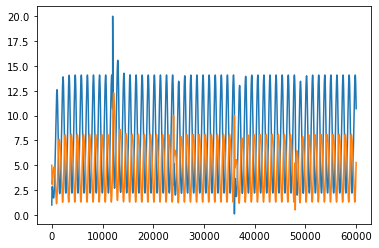

In [6]:
plt.plot(pop_data[0])
plt.plot(pop_data[1])

In [7]:
tspan_ = []
for i in range(5):
    tspan_.extend(tspan.flatten())

In [8]:
A_array = [ 0.2, 0.5, 0.8, 1]
k_array = [0.2, 0.5, 0.8, 1]
p_array = [0, 6, 12, 18]

u_matrix = np.array([], dtype=np.float).reshape(len(tspan_), 0)
lab_name = []
for i in k_array:
    for j in A_array:
        for k in p_array:
            tmp = 2*np.pi*((np.array(tspan_) - k) % 24)/24
            k_ = i*(1+j*np.cos(tmp)).reshape(-1, 1)
            u_matrix  = np.hstack([u_matrix, k_.reshape(-1,1)])
            lab_name.append("p:{0} A:{1} k:{2}".format(str(k), str(j), str(i)))


In [9]:
one_vec = np.ones((len(tspan_),1))
theta_inital = np.hstack([one_vec, pop_data[0].reshape(-1,1), pop_data[1].reshape(-1,1)])
theta_ = np.hstack([theta_inital, u_matrix*pop_data[0].reshape(-1,1), u_matrix*pop_data[1].reshape(-1,1)])

In [10]:
Xi_curr = ut.sparsifyDynamics(theta_, dpop_data.T, 0.01)

In [11]:
clf = linear_model.Lasso(alpha=1e-3, fit_intercept=False, max_iter=1e5)
clf.fit(theta_,dpop_data.T)
Xi = clf.coef_

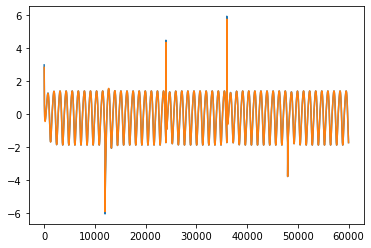

In [15]:
x = theta_.dot(Xi.T)
plt.plot(dpop_data[0])
plt.plot(x[:,0])

In [66]:
ind0, = np.where(abs(Xi[1, 3:67]) > 0.1)
for i in ind0:
    print(lab_name[i])

p:6 A:0.8 k:1
p:6 A:1 k:1


In [69]:
Xi[1, ind0+3]

array([0.14601351, 0.22231736])

In [42]:
len(Xi[0,67:])

64

In [70]:
Xi[0]

array([ 8.43689291e-01, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -3.78677679e-02, -1.24723871e-03, -5.15024596e-04, -1.48679518e-03,
       -1.54384335e-01, -1.04295842e-03, -6.88038805e-04, -4.05093078e-04,
       -1.50230590e-01, -7.23463426e-04, -7.11813230e-05, -2.08079466e-02,
       -9.86029309e-03, -